In [1]:
import numpy as np
import pandas as pd

In [2]:
#df=pd.read_csv('Housing.csv')
df=pd.read_csv(r"D:\PycharmProjects\pythonProject\ML_LAB\LAB_1\Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.isnull().sum()


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [4]:
nonnumerical = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for feature in nonnumerical:
    df[feature] = df[feature].apply(lambda x: 1 if x == 'yes' else 0)

df['furnishingstatus'] = df['furnishingstatus'].apply(lambda x: 1 if x == 'furnished'  else (0 if x == 'semifurnished' else -1))

print(df.head())
print(df.info())
print(df.columns)
area_mean=df['area'].mean()
price_mean=df['price'].mean()
area_std=df['area'].std()
price_std=df['price'].std()
X= df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']].values

y_actual =df['price'].values

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  
0                 1  
1                 1  
2                -1  
3                 1  
4                 1  
<class 'pandas.core.frame.

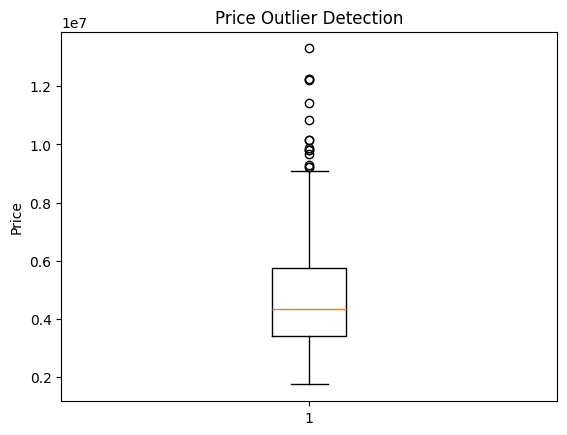

In [5]:
import matplotlib.pyplot as plt
plt.boxplot(df['price'])
plt.title('Price Outlier Detection')
plt.ylabel('Price')
plt.show()

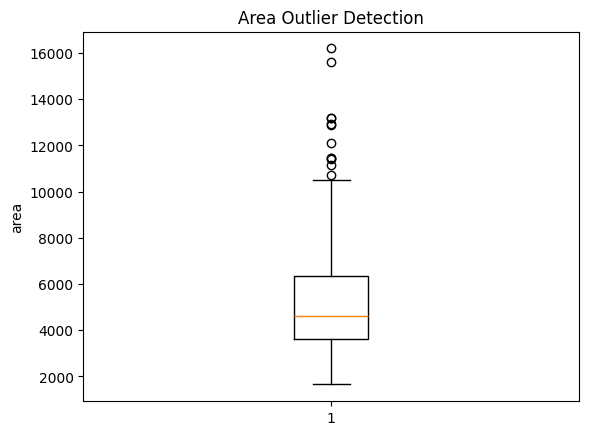

In [7]:
plt.boxplot(df['area'])
plt.title('Area Outlier Detection')
plt.ylabel('area')
plt.show()

In [8]:
Q1 = df['area'].quantile(0.25)
Q3 = df['area'].quantile(0.75)
IQR = Q3 - Q1

In [10]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['area'] < lower_bound) | (df['area'] > upper_bound)].index
print("Outliers based on area:", outliers.tolist())

Outliers based on area: [7, 10, 56, 64, 66, 69, 125, 129, 186, 191, 211, 403]


In [ ]:
df.drop(outliers, inplace=True)
#what does mean by inplace=True? It means that the changes are made directly to the original DataFrame without needing to assign the result to a new variable.


In [7]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

In [8]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_indexes = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)].index
print("Outlier Indexes:", outlier_indexes.tolist())

Outlier Indexes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [86]:
y_actua=y_actual.copy()

In [87]:
price_mean

np.float64(4766729.247706422)

In [88]:
area_mean

np.float64(5150.54128440367)

In [90]:
X = X.astype(float)
X_mean=X[:,0].mean()
X_std=X[:,0].std()
X[:,0]=(X[:,0]-X[:,0].mean())/X[:,0].std()
print(X[:,0])
X = np.hstack((np.ones((X.shape[0], 1)), X))
print(X[:4])
y_actual=(y_actual-np.mean(y_actual))/np.std(y_actual)

[ 1.04672629e+00  1.75700953e+00  2.21823241e+00  1.08362412e+00
  1.04672629e+00  1.08362412e+00  1.58174483e+00  5.09626319e+00
  1.36035785e+00  2.76484076e-01  3.71259454e+00  3.91789797e-01
  6.45462381e-01 -7.61267407e-01  1.22199098e+00  3.91789797e-01
  6.68523525e-01  1.54484700e+00 -2.53922238e-01  5.85503407e-01
 -3.83064644e-01  9.24502225e-01  1.33729670e+00 -2.72371153e-01
  1.68321386e+00  6.40850153e-01  3.91789797e-01  1.71780558e+00
  1.29117442e+00  1.61178356e-01  1.07209355e+00  8.53012678e-01
 -1.24779831e-01  3.73340881e-01  7.79217017e-01  8.53012678e-01
  1.07532211e+00  1.77545844e+00  3.91789797e-01  3.91789797e-01
  6.45462381e-01  5.57830034e-01  6.13176780e-01  3.91789797e-01
  3.91789797e-01  3.91789797e-01  3.91789797e-01  6.68523525e-01
 -3.92289102e-01  1.05595075e+00  1.05595075e+00  5.41687233e-01
  3.91789797e-01 -2.49652752e-04  3.91789797e-01  3.91789797e-01
  2.90084227e+00  1.77545844e+00  1.16664424e+00  3.91789797e-01
  3.91789797e-01  1.72011

In [70]:
weights =np.random.rand(X.shape[1]).reshape(-1,1)
weights

array([[0.32417391],
       [0.20622391],
       [0.68179848],
       [0.48905184],
       [0.67540798],
       [0.22178713],
       [0.8425678 ],
       [0.69182551],
       [0.27128601],
       [0.58722934],
       [0.51297225],
       [0.52371017],
       [0.92831609]])

In [71]:
def y_predict(X, weights):
    return X @ weights
y_predicted = y_predict(X, weights)
print(y_predicted.shape)

#print(y_predicted)
def mse_loss(y_actual, y_predicted):
    return np.mean((y_actual.reshape(-1,1) - y_predicted) ** 2)

print(mse_loss(y_actual, y_predicted))

def weight_gradients(x, y_actual, weights):
    y_predicted = y_predict(x, weights).reshape(1, -1)
    return -2/(len(y_actual))*(y_actual-y_predicted)@x

(545, 1)
27.00779529649828


In [72]:
def mini_batch_gradient_descent(X, y_actual, weights, learning_rate=0.001):
        indexes= np.arange(len(y_actual))
        np.random.shuffle(indexes)
        batches= indexes.reshape(-1, 5)
        for batch in batches:
            X_shuffled = X[batch]
            y_actual_shuffled = y_actual[batch]
            gradients = weight_gradients(X_shuffled, y_actual_shuffled, weights)
            weights -= learning_rate * gradients.T

In [73]:
for i in range(1000):
 print(f'epoch {i+1} loss:{mse_loss(y_actual, y_predict(X, weights))}')
 mini_batch_gradient_descent(X, y_actual, weights, learning_rate=0.001)


epoch 1 loss:27.00779529649828
epoch 2 loss:1.142108360639195
epoch 3 loss:0.9613824066354436
epoch 4 loss:0.8505657402649245
epoch 5 loss:0.752344484423784
epoch 6 loss:0.6872305711819214
epoch 7 loss:0.6372986926226084
epoch 8 loss:0.6042395484790273
epoch 9 loss:0.569994892775696
epoch 10 loss:0.5467814560206422
epoch 11 loss:0.5286479645044565
epoch 12 loss:0.5135200035404669
epoch 13 loss:0.5020589163950638
epoch 14 loss:0.4909724807555443
epoch 15 loss:0.48331263487930154
epoch 16 loss:0.47511562866811696
epoch 17 loss:0.46976128303312586
epoch 18 loss:0.46402604201829406
epoch 19 loss:0.4621560083607613
epoch 20 loss:0.45393239485648823
epoch 21 loss:0.45170941327077846
epoch 22 loss:0.4482779719532044
epoch 23 loss:0.44303479556676767
epoch 24 loss:0.44093937589805327
epoch 25 loss:0.43910084489672546
epoch 26 loss:0.4394553410249381
epoch 27 loss:0.43451696360469283
epoch 28 loss:0.43055547492303625
epoch 29 loss:0.4275491084455139
epoch 30 loss:0.42661041338656214
epoch 31 lo

In [59]:
hel=[1,2,3,4,5]
predicted=y_predict(X[hel], weights)
actual=y_actual[hel]

for i,j in zip(actual,predicted):
     print(f'actual val:{i} predict val {j}')


actual val:4.004484046345774 predict val [3.22981977]
actual val:4.004484046345774 predict val [1.53952495]
actual val:3.985754677028334 predict val [2.01535995]
actual val:3.554979182727218 predict val [1.12218934]
actual val:3.255309273648181 predict val [1.9677776]


In [60]:
X[0:5]

array([[ 1.        ,  1.04672629,  4.        ,  2.        ,  3.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         2.        ,  1.        ,  1.        ],
       [ 1.        ,  1.75700953,  4.        ,  4.        ,  4.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         3.        ,  0.        ,  1.        ],
       [ 1.        ,  2.21823241,  3.        ,  2.        ,  2.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         2.        ,  1.        , -1.        ],
       [ 1.        ,  1.08362412,  4.        ,  2.        ,  2.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         3.        ,  1.        ,  1.        ],
       [ 1.        ,  1.04672629,  4.        ,  1.        ,  2.        ,
         1.        ,  1.        ,  1.        ,  0.        ,  1.        ,
         2.        ,  0.        ,  1.        ]])

In [74]:
predicted_actual=predicted*price_std+price_mean
predicted_actual[0:5]

array([[10807912.098126  ],
       [ 7646317.70625889],
       [ 8536338.33648147],
       [ 6865716.63677775],
       [ 8447338.43090842]])

In [80]:
y_actua[0:5]

array([13300000, 12250000, 12250000, 12215000, 11410000])